#Necessary Data Processging will be done first

In [2]:
#importing necessary libraries first
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Get the data from the CSV files which required
df = pd.read_csv('ml_case_study.csv')
cities = pd.read_csv('cities.csv')
colleges = pd.read_csv('Colleges.csv')

### In ml_case_study file, we have college names which we need to give weightages and we have city names which will be defined in metro or non_metro

In [4]:
# creating lists of metro and non metro cities from cities.csv
metro = cities['Metro City'].tolist()
non_metro = cities['non-metro cities'].tolist()
city_list = df['City'].tolist()

In [5]:
# converting city names from to metro and non_metro using the list we made above.
for i in df.City:
    if i in metro:
        df["City"].replace(i, "metro", inplace= True)
    elif i in non_metro:
        df["City"].replace(i, "non_metro", inplace= True)

In [6]:
print(df.head())

             College       City       Role  Previous CTC  Previous job change  \
0        SVNIT Surat  non_metro    Manager         55523                    3   
1         NIT Bhopal  non_metro  Executive         57081                    1   
2       IEM, Kolkata  non_metro  Executive         60347                    2   
3  KIIT, Bhubaneswar  non_metro  Executive         49010                    2   
4                DTU  non_metro  Executive         57879                    4   

   Graduation Marks  EXP (Month)       CTC  
0                66           19  71406.58  
1                84           18  68005.87  
2                52           28  76764.02  
3                81           33  82092.39  
4                74           32  73878.10  


In [7]:
# Extracting lists of Tier1, Tier2 and Tier3 colleages from Colleges 
tier1 = colleges["Tier 1"].tolist()
tier2 = colleges["Tier 2"].tolist()
tier3 = colleges["Tier 3"].tolist()

In [8]:
# Converting colleges names to weights based on from which tier they belong using loop.
for i in df.College:
    if i in tier1:
        df["College"].replace(i, 1, inplace = True)
    elif i in tier2:
        df["College"].replace(i, 2, inplace = True)
    elif i in tier3:
        df["College"].replace(i, 3, inplace = True)

In [9]:
df.head(50)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,non_metro,Manager,55523,3,66,19,71406.58
1,2,non_metro,Executive,57081,1,84,18,68005.87
2,3,non_metro,Executive,60347,2,52,28,76764.02
3,3,non_metro,Executive,49010,2,81,33,82092.39
4,1,non_metro,Executive,57879,4,74,32,73878.10
5,2,non_metro,Executive,54340,4,73,31,59950.89
6,3,metro,Executive,60298,1,42,46,66602.34
7,2,metro,Executive,49944,2,56,37,57768.44
8,3,metro,Executive,53124,4,40,37,70083.30
9,1,non_metro,Executive,51141,1,47,60,85648.48


In [10]:
# creating dummies for city column

df = pd.get_dummies( df, columns = ['City'], drop_first = False)

In [11]:
df.head(20)

,College,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,City_non_metro
0,2,Manager,55523,3,66,19,71406.58,False,True
1,2,Executive,57081,1,84,18,68005.87,False,True
2,3,Executive,60347,2,52,28,76764.02,False,True
3,3,Executive,49010,2,81,33,82092.39,False,True
4,1,Executive,57879,4,74,32,73878.10,False,True
5,2,Executive,54340,4,73,31,59950.89,False,True
6,3,Executive,60298,1,42,46,66602.34,True,False
7,2,Executive,49944,2,56,37,57768.44,True,False
8,3,Executive,53124,4,40,37,70083.30,True,False
9,1,Executive,51141,1,47,60,85648.48,False,True


In [12]:
# As our City_non_metro and City_metro contain boolean, we need to convert it into integer value.

df['City_non_metro'] = df['City_non_metro'].astype(int)
df['City_metro'] = df['City_metro'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   Role                 1589 non-null   object 
 2   Previous CTC         1589 non-null   int64  
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   City_metro           1589 non-null   int32  
 8   City_non_metro       1589 non-null   int32  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 99.4+ KB


In [14]:
df.head(20)

,College,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,City_non_metro
0,2,Manager,55523,3,66,19,71406.58,0,1
1,2,Executive,57081,1,84,18,68005.87,0,1
2,3,Executive,60347,2,52,28,76764.02,0,1
3,3,Executive,49010,2,81,33,82092.39,0,1
4,1,Executive,57879,4,74,32,73878.10,0,1
5,2,Executive,54340,4,73,31,59950.89,0,1
6,3,Executive,60298,1,42,46,66602.34,1,0
7,2,Executive,49944,2,56,37,57768.44,1,0
8,3,Executive,53124,4,40,37,70083.30,1,0
9,1,Executive,51141,1,47,60,85648.48,0,1


In [15]:
# dropped the column City_non_Metro and keep only City_metro column
df.drop(columns = ['City_non_metro'], inplace= True)

In [16]:
#Now we wil create dummies for Role column

df = pd.get_dummies(df, columns = ['Role'], drop_first = True)

In [17]:
# converted boolean values to integer
df['Role_Manager'] = df['Role_Manager'].astype(int)

### Finding if the total counts of each column is same ensure there is no missing value

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   Previous CTC         1589 non-null   int64  
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   City_metro           1589 non-null   int32  
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 87.0 KB


### Finding any skewness in the data

#### As per above Table, Mean and Median values are close to each other and difference between 75% value and max is not large.

In [19]:
df.describe()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,0.206419
std,0.838330,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.404862
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000
50%,2.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


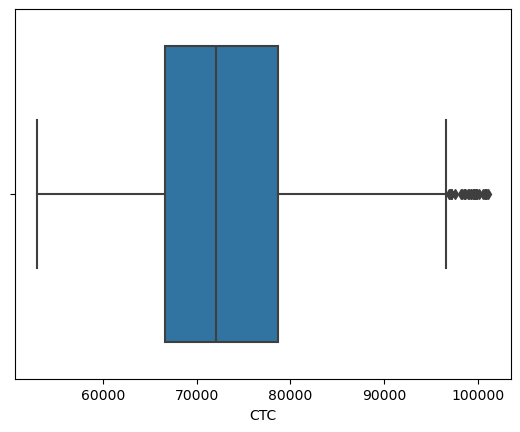

In [20]:
import matplotlib.pyplot as plt

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lv = Q1 - 1.5 * IQR
    uv = Q3 + 1.5 * IQR
    return df[(df[column] >= lv) & (df[column] <= uv)]

# Remove outliers from the CTC column
df = remove_outliers(df, 'CTC')

# Plot to confirm outliers removal
sns.boxplot(x=df['CTC'])
plt.show()

In [21]:
df.describe()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,Role_Manager
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.00000,1495.000000,1495.000000
mean,1.982609,55164.948495,2.529097,59.846823,38.623411,73304.06687,0.514381,0.158528
std,0.839754,6596.626311,1.118927,14.974810,14.063420,9781.11670,0.499960,0.365358
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.32000,0.000000,0.000000
25%,1.000000,50268.500000,2.000000,46.500000,26.000000,66657.86000,0.000000,0.000000
50%,2.000000,54876.000000,3.000000,60.000000,38.000000,72088.04000,1.000000,0.000000
75%,3.000000,59588.000000,4.000000,74.000000,51.000000,78697.06000,1.000000,0.000000
max,3.000000,77911.000000,4.000000,85.000000,64.000000,101108.86000,1.000000,1.000000


In [23]:
#  train-test split
X = df.drop(columns=['CTC'])
y = df['CTC']

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE on test: {mse}')
    print("R-squared:", r2)
    print('')

Linear Regression MSE on test: 61297550.257954195
R-squared: 0.37397374883679746

Ridge Regression MSE on test: 61318961.08600006
R-squared: 0.37375508201635443

Gradient Boosting MSE on test: 59503244.44850687
R-squared: 0.39229882927804893

Random Forest MSE on test: 55354263.30048877
R-squared: 0.434671992696656



In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    print(f'{name} MSE on training set: {mse}')
    print("R-squared:", r2)
    print('')

Linear Regression MSE on training set: 58284276.28250382
R-squared: 0.38666160388336746

Ridge Regression MSE on training set: 58285296.748904586
R-squared: 0.38665086528857906

Gradient Boosting MSE on training set: 37902534.355202615
R-squared: 0.6011432051159566

Random Forest MSE on training set: 6846465.57434522
R-squared: 0.9279531207682306



In [26]:
import warnings
warnings.filterwarnings('ignore', message='X does not have valid feature names, but')

# 2	57081	1	84	18	68005.87	1	0

x = np.asarray([2,57081,1,84,19,1,0])
x_reshaped = x.reshape(1, -1)  # Reshape for single data point with multiple features
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_pred = model.predict(x_reshaped)
    print(f'{name}: {y_pred}')

Linear Regression: [67066.24606415]
Ridge Regression: [67082.48366422]
Gradient Boosting: [65657.05714623]
Random Forest: [64596.9851]
